In [1]:
#!pip install unrar

In [22]:
#!unrar x data.rar

In [37]:
import pandas as pd
import os 

In [60]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [61]:
from matplotlib import image
import matplotlib.pyplot as plt

In [62]:
path_to_folders = "../raw_data/data"    

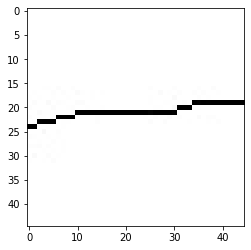

In [63]:
image1 = image.imread(f'{path_to_folders}/-/-_66.jpg') 
plt.imshow(image1, cmap='gray')

In [82]:
#path_to_folders = "extracted_images/"    
list_of_folders = os.listdir(path_to_folders)
# list_of_folders.remove('.DS_Store')
len(list_of_folders)

82

In [43]:
array = np.array(vectorized_images)

In [69]:
list_of_folders_folders

['beta',
 'pm',
 'Delta',
 'gamma',
 'infty',
 'rightarrow',
 '.DS_Store',
 'div',
 'gt',
 'forward_slash',
 'leq',
 'mu',
 'exists',
 'in',
 'times',
 'sin',
 'R',
 'u',
 '9',
 '0',
 '{',
 '7',
 'i',
 'N',
 'G',
 '+',
 ',',
 '6',
 'z',
 '}',
 '1',
 '8',
 'T',
 'S',
 'cos',
 'A',
 '-',
 'f',
 'o',
 'H',
 'sigma',
 'sqrt',
 'pi',
 'int',
 'sum',
 'lim',
 'lambda',
 'neq',
 'log',
 'ldots',
 'forall',
 'lt',
 'theta',
 'ascii_124',
 'M',
 '!',
 'alpha',
 'j',
 'C',
 ']',
 '(',
 'd',
 'v',
 'prime',
 'q',
 '=',
 '4',
 'X',
 'phi',
 '3',
 'tan',
 'e',
 ')',
 '[',
 'b',
 'k',
 'l',
 'geq',
 '2',
 'y',
 '5',
 'p',
 'w']

In [44]:
print(len(array), len(what_folder))

0 0


In [45]:
array.shape

(0,)

In [46]:
import pathlib
data_dir = pathlib.Path(path_to_folders)

In [47]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

375974


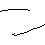

In [48]:
import PIL
import PIL.Image

equal_sign = list(data_dir.glob('=/*'))
PIL.Image.open(str(equal_sign[10]))

In [49]:
batch_size = 32
img_height = 45
img_width = 45

In [50]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 375974 files belonging to 82 classes.
Using 300780 files for training.


In [81]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 45, 45, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [52]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 375974 files belonging to 82 classes.
Using 75194 files for validation.


In [53]:
# la suite ici ;-) https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
#dct={'Delta' : '\Delta', 'alpha' : '\alpha', 'ascii_124' : '|', 'beta':'\beta', 'cos':'\cos', \
#     'exists':'\exists','forall':'\forall', 'forward_slash':'/', 'gamma':'\gamma', 'geq' :'\geq',\
#     'gt':'>', 'in':'\in','infty':'\infty','lambda':'\lambda', 'ldots':'\lodts', 'leq':'\leq',\
#     'lim' : '\lim', 'log':'\log','It':'<','mu':'\mu', 'neq':'\neq', 'phi':'\phi','pi':'\pi',\
#     'pm':'\pm','rightarrow':'\rightarrow', 'sigma': '\sigma','sin':'\sin', 'sqrt':'\sqrt',\
#     'sum': '\sum', 'tan':'\tan', 'theta':'\theta', 'times': '\cdot'} #attention div et int et lim et prime et sum

In [ ]:
#set(df['target'].replace(dct))

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models

In [127]:
num_classes = 82 # (on avait 83 dossiers dans l'une des premieres cellules)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(45,45,1)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='softmax')
])

In [128]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
9400/9400 [==============================] - 484s 51ms/step - loss: 0.0000e+00 - accuracy: 0.0384 - val_loss: 0.0000e+00 - val_accuracy: 0.0363
Epoch 2/3
9400/9400 [==============================] - 474s 50ms/step - loss: 0.0000e+00 - accuracy: 0.0384 - val_loss: 0.0000e+00 - val_accuracy: 0.0363
Epoch 3/3
4718/9400 [==============>...............] - ETA: 4:49 - loss: 0.0000e+00 - accuracy: 0.0384

In [90]:
model.evaluate(val_ds)

2350/2350 [==============================] - 31s 13ms/step - loss: 0.2613 - accuracy: 0.9198


[0.26130610704421997, 0.9197941422462463]

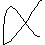

In [85]:
img = tf.keras.utils.load_img(
    "/Users/antoinemoreno/code/AntoineMoreno/equations/raw_data/data/alpha/exp8716.jpg", target_size=(img_height, img_width)
)
img

In [110]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, -1) # Create a batch

predictions = model.predict(img_array)

2022-06-01 15:12:40.758705: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at conv_ops_fused_impl.h:680 : INVALID_ARGUMENT: input depth must be evenly divisible by filter depth: 1 vs 3


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_3/conv2d_9/Relu' defined at (most recent call last):
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
      await result
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/7z/lyzbs3rs7cqfcd1z043vxh9h0000gn/T/ipykernel_29191/3013393343.py", line 7, in <module>
      predictions = model.predict(img_array)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 1791, in predict_step
      return self(x, training=False)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/layers/convolutional/base_conv.py", line 278, in call
      return self.activation(outputs)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/activations.py", line 311, in relu
      return backend.relu(x, alpha=alpha, max_value=max_value, threshold=threshold)
    File "/Users/antoinemoreno/.pyenv/versions/3.8.13/envs/lewagon/lib/python3.8/site-packages/keras/backend.py", line 4992, in relu
      x = tf.nn.relu(x)
Node: 'sequential_3/conv2d_9/Relu'
input depth must be evenly divisible by filter depth: 1 vs 3
	 [[{{node sequential_3/conv2d_9/Relu}}]] [Op:__inference_predict_function_286126]

In [114]:
predictions

array([[-18.440474 , -13.763997 , -28.883615 ,  -5.0610905,  -8.105446 ,
         -7.681551 ,  -7.6947045, -10.985758 ,  -8.304536 , -14.150326 ,
         -5.345291 , -15.609024 , -10.184617 , -10.689733 , -15.658138 ,
        -33.207607 , -16.020767 , -11.558451 , -13.3850765, -43.46583  ,
        -19.918184 ,  -6.046442 , -12.67287  ,  -6.4512024, -10.486735 ,
        -15.864687 ,  -5.368768 ,  -3.4595888, -52.359978 , -44.895306 ,
         -1.1352631, -17.295279 ,  -5.82702  , -30.439127 , -17.984655 ,
         -9.841648 , -27.273474 , -16.675335 , -47.554314 , -12.649038 ,
        -14.387084 , -21.067074 ,  -9.134338 , -32.054764 , -33.93274  ,
        -13.809819 , -43.944855 ,  -4.669101 , -23.938913 ,  -9.913799 ,
        -15.819715 ,  -9.750871 , -34.52995  , -41.661095 , -12.315814 ,
        -21.35783  , -17.412357 , -14.024489 , -18.51036  , -16.865309 ,
        -16.667995 , -21.067526 ,  -5.701208 , -13.714584 , -26.344084 ,
        -16.466274 , -22.548393 , -30.98359  , -17.

In [107]:
class_names = train_ds.class_names
class_names

['!',
 '(',
 ')',
 '+',
 ',',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '=',
 'A',
 'C',
 'Delta',
 'G',
 'H',
 'M',
 'N',
 'R',
 'S',
 'T',
 'X',
 '[',
 ']',
 'alpha',
 'ascii_124',
 'b',
 'beta',
 'cos',
 'd',
 'div',
 'e',
 'exists',
 'f',
 'forall',
 'forward_slash',
 'gamma',
 'geq',
 'gt',
 'i',
 'in',
 'infty',
 'int',
 'j',
 'k',
 'l',
 'lambda',
 'ldots',
 'leq',
 'lim',
 'log',
 'lt',
 'mu',
 'neq',
 'o',
 'p',
 'phi',
 'pi',
 'pm',
 'prime',
 'q',
 'rightarrow',
 'sigma',
 'sin',
 'sqrt',
 'sum',
 'tan',
 'theta',
 'times',
 'u',
 'v',
 'w',
 'y',
 'z',
 '{',
 '}']

In [101]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [102]:
get_label(path_to_folders)

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [108]:
parts = tf.strings.split(file_path, os.path.sep)

NameError: name 'file_path' is not defined

In [109]:
list_of_folders_folders == class_names

NameError: name 'list_of_folders_folders' is not defined

In [ ]:
list_of_folders_folders